<a href="https://colab.research.google.com/github/JasminAcostaMendez26/Estad-stica-Verano/blob/main/PROBLEMARIO_UNIDAD_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemario de bloqueo

##Problema 1:
Se hace un estudio sobre la efectividad de tres marcas de atomizador para matar moscas. Para ello, cada producto se aplica a un grupo de 100 moscas, y se cuenta el número de moscas muertas expresado en porcentajes. Se hicieron seis réplicas, pero en días diferentes; por ello, se sospecha que puede haber algún efecto importante debido a esta fuente de variación. Los datos obtenidos se muestran a continuación:

| Marca de atomizador | Réplica 1 | Réplica 2 | Réplica 3 | Réplica 4 | Réplica 5 | Réplica 6 |
|----------------------|-----------|-----------|-----------|-----------|-----------|-----------|
| 1                   | 72        | 65        | 67        | 75        | 62        | 73        |
| 2                   | 55        | 59        | 68        | 70        | 53        | 50        |
| 3                   | 64        | 74        | 61        | 58        | 51        | 69        |

**Preguntas:**<br>
a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?  
c) ¿Hay algún atomizador mejor? Argumente su respuesta.  
d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.  
e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.


In [ ]:
import pandas as pd
from io import StringIO

data = '''
marca,replica,valor
1,1,72
1,2,65
1,3,67
1,4,75
1,5,62
1,6,73
2,1,55
2,2,59
2,3,68
2,4,70
2,5,53
2,6,50
3,1,64
3,2,74
3,3,61
3,4,58
3,5,51
3,6,69
'''

df = pd.read_csv(StringIO(data))
df


,marca,replica,valor
0,1,1,72
1,1,2,65
2,1,3,67
3,1,4,75
4,1,5,62
5,1,6,73
6,2,1,55
7,2,2,59
8,2,3,68
9,2,4,70


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'valor ~ C(marca) + C(replica)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#H0:No hay diferencia significativa entre las replicas

,sum_sq,df,F,PR(>F)
C(marca),296.333333,2.0,2.880752,0.102804
C(replica),281.333333,5.0,1.093973,0.420718
Residual,514.333333,10.0,NaN,NaN


valor-p (Shapiro) = 0.5541005255267678


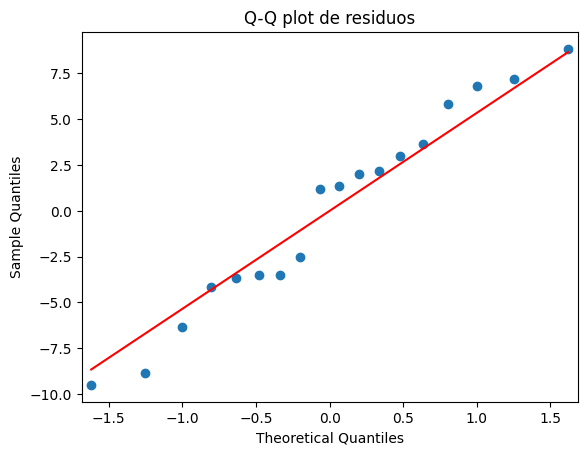

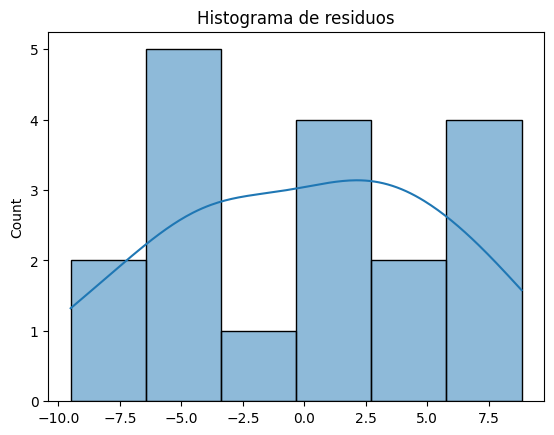

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
#Hay normalidad

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['marca'] == 1]['valor']
grupo2 = df[df['marca'] == 2]['valor']
grupo3 = df[df['marca'] == 3]['valor']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
if p < 0.05:
    print("Las varianzas no son iguales o hay heterocedasticidad")
else:
    print("Las varianzas son iguales o hay Homocedasticidad")

p-valor de Levene: 0.5999140287120529
Las varianzas son iguales


In [ ]:
#Hay Homocedasticidad

 Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -9.8333 0.0808 -14.6661 -5.0006   True
     1      3  -6.1667 0.3341 -10.9994 -1.3339   True
     2      3   3.6667 0.6655  -1.1661  8.4994  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

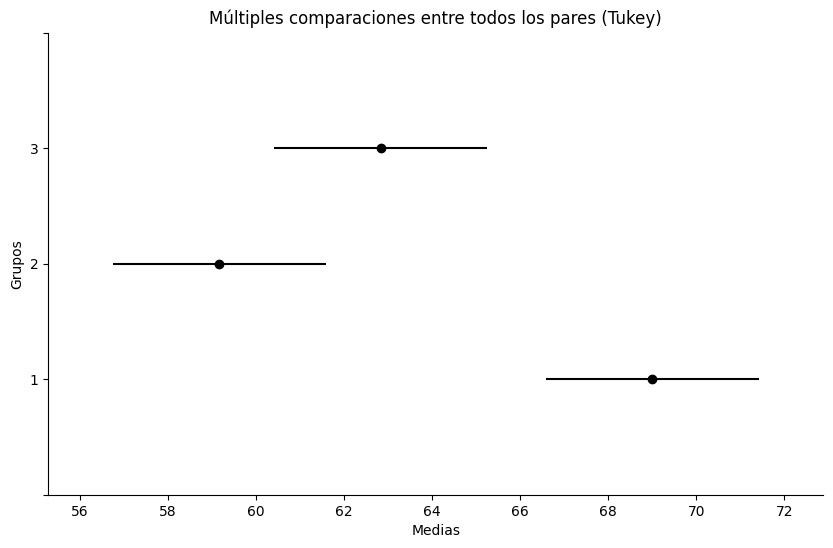

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['valor'], groups=df['marca'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

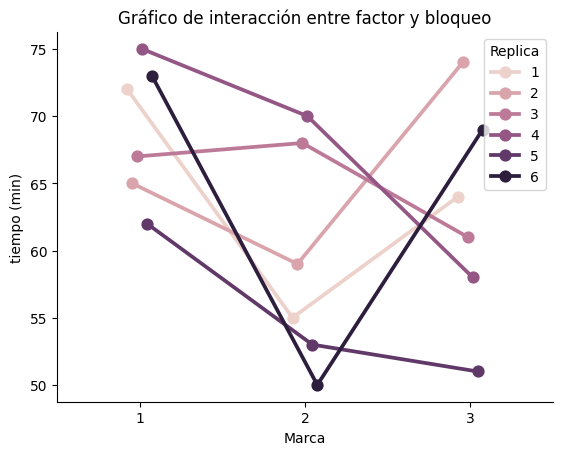

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="marca", y="valor", hue="replica", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("Marca")
plt.ylabel("tiempo (min)")
plt.legend(title="Replica")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()



In [ ]:
df.groupby(["marca"])["valor"].mean()

,valor
marca,
1,69.000000
2,59.166667
3,62.833333


In [ ]:
modelo_lineal.params

,0
Intercept,69.000000
C(marca)[T.2],-9.833333
C(marca)[T.3],-6.166667
C(replica)[T.2],2.333333
C(replica)[T.3],1.666667
C(replica)[T.4],4.000000
C(replica)[T.5],-8.333333
C(replica)[T.6],0.333333


##Problema 2:
En una empresa lechera se tienen varios silos para almacenar leche (cisternas de 60 000 L). Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. Se sospecha que en algunos silos hay problemas, por ello, durante cinco días se decide registrar la temperatura a cierta hora crítica. Obviamente la temperatura de un día a otro es una fuente de variabilidad que podría impactar la variabilidad total.

| Silo | Lunes | Martes | Miércoles | Jueves | Viernes |
|------|-------|--------|-----------|--------|---------|
| A    | 4.0   | 4.0    | 5.0       | 0.5    | 3.0     |
| B    | 5.0   | 6.0    | 2.0       | 4.0    | 4.0     |
| C    | 4.5   | 4.0    | 3.5       | 2.0    | 3.0     |
| D    | 2.5   | 4.0    | 6.5       | 4.5    | 4.0     |
| E    | 4.0   | 4.0    | 3.5       | 2.0    | 4.0     |

**Preguntas:**<br>
a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?  
b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
c) ¿Hay diferencia entre los silos?  
d) ¿La temperatura de un día a otro es diferente?  
e) Revise residuos, ¿hay algún problema evidente?


In [ ]:
import pandas as pd
from io import StringIO

data = '''
silo,dia,valor
A,Lunes,4.0
A,Martes,4.0
A,Miércoles,5.0
A,Jueves,0.5
A,Viernes,3.0
B,Lunes,5.0
B,Martes,6.0
B,Miércoles,2.0
B,Jueves,4.0
B,Viernes,4.0
C,Lunes,4.5
C,Martes,4.0
C,Miércoles,3.5
C,Jueves,2.0
C,Viernes,3.0
D,Lunes,2.5
D,Martes,4.0
D,Miércoles,6.5
D,Jueves,4.5
D,Viernes,4.0
E,Lunes,4.0
E,Martes,4.0
E,Miércoles,3.5
E,Jueves,2.0
E,Viernes,4.0
'''

df = pd.read_csv(StringIO(data))
df

,silo,dia,valor
0,A,Lunes,4.0
1,A,Martes,4.0
2,A,Miércoles,5.0
3,A,Jueves,0.5
4,A,Viernes,3.0
5,B,Lunes,5.0
6,B,Martes,6.0
7,B,Miércoles,2.0
8,B,Jueves,4.0
9,B,Viernes,4.0


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'valor ~ C(silo) + C(dia)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#H0:No hay diferencia significativa entre las replicas

,sum_sq,df,F,PR(>F)
C(silo),4.46,4.0,0.690402,0.609212
C(dia),9.76,4.0,1.510836,0.246022
Residual,25.84,16.0,NaN,NaN


valor-p (Shapiro) = 0.1527850137871632


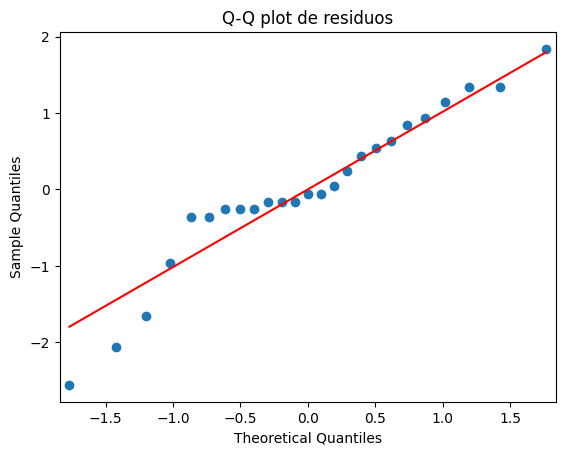

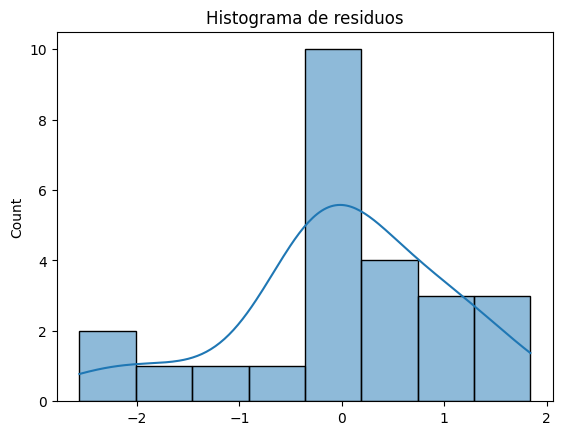

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['silo'] == 'A']['valor']
grupo2 = df[df['silo'] == 'B']['valor']
grupo3 = df[df['silo'] == 'C']['valor']
grupo4 = df[df['silo'] == 'D']['valor']
grupo5 = df[df['silo'] == 'E']['valor']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
if p < 0.05:
    print("Las varianzas no son iguales o hay heterocedasticidad")
else:
    print("Las varianzas son iguales o hay Homocedasticidad")

p-valor de Levene: 0.8915311038595306
Las varianzas son iguales o hay Homocedasticidad


Multiple Comparison of Means - Tukey HSD, FWER=0.50
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B      0.9 0.8211 -0.4705 2.2705  False
     A      C      0.1    1.0 -1.2705 1.4705  False
     A      D      1.0 0.7596 -0.3705 2.3705  False
     A      E      0.2 0.9992 -1.1705 1.5705  False
     B      C     -0.8 0.8745 -2.1705 0.5705  False
     B      D      0.1    1.0 -1.2705 1.4705  False
     B      E     -0.7 0.9183 -2.0705 0.6705  False
     C      D      0.9 0.8211 -0.4705 2.2705  False
     C      E      0.1    1.0 -1.2705 1.4705  False
     D      E     -0.8 0.8745 -2.1705 0.5705  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

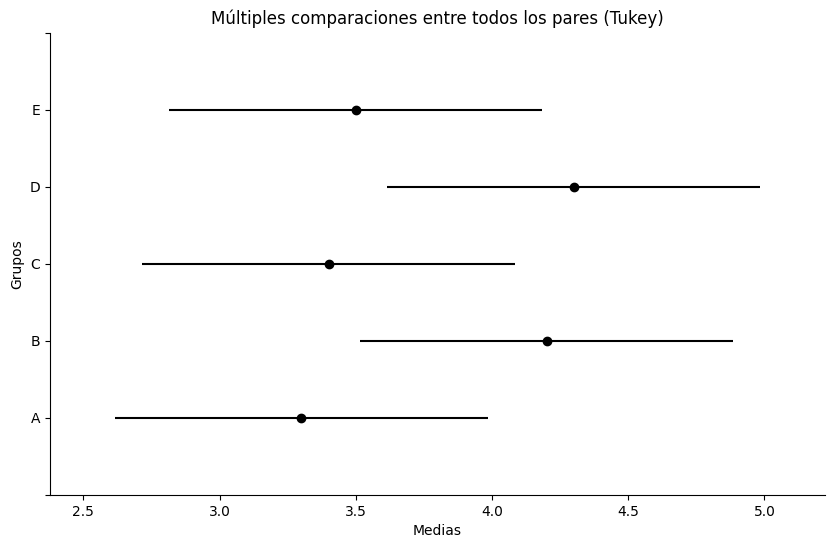

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['valor'], groups=df['silo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

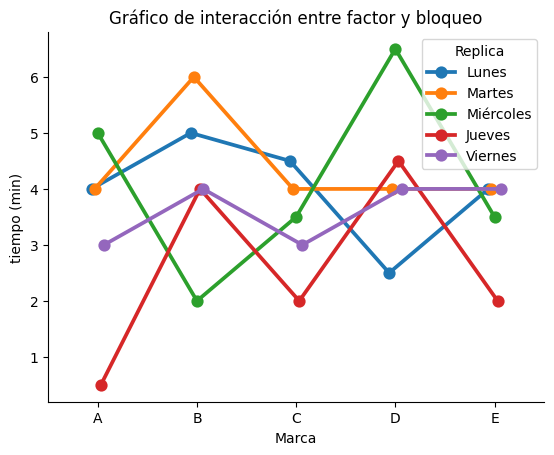

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="silo", y="valor", hue="dia", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("Marca")
plt.ylabel("tiempo (min)")
plt.legend(title="Replica")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()



## Problema 3
Se diseñó un experimento para estudiar el rendimiento de cuatro detergentes. Las siguientes lecturas de “blancura” se obtuvieron con un equipo especial diseñado para 12 cargas de lavado, distribuidas en tres modelos de lavadoras:

| Detergente | Lavadora 1 | Lavadora 2 | Lavadora 3 |
|------------|------------|------------|------------|
| A          | 45         | 43         | 51         |
| B          | 47         | 44         | 52         |
| C          | 50         | 49         | 57         |
| D          | 42         | 37         | 49         |

**Preguntas:**<br>
a) Señale el nombre del diseño experimental utilizado.  
b) Formule la hipótesis que se quiere probar en este problema.  
c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.  



In [ ]:
import pandas as pd
from io import StringIO

data = '''
detergente,lavadora,valor
A,Lavadora 1,45
A,Lavadora 2,43
A,Lavadora 3,51
B,Lavadora 1,47
B,Lavadora 2,44
B,Lavadora 3,52
C,Lavadora 1,50
C,Lavadora 2,49
C,Lavadora 3,57
D,Lavadora 1,42
D,Lavadora 2,37
D,Lavadora 3,49
'''

df = pd.read_csv(StringIO(data))
df


,detergente,lavadora,valor
0,A,Lavadora 1,45
1,A,Lavadora 2,43
2,A,Lavadora 3,51
3,B,Lavadora 1,47
4,B,Lavadora 2,44
5,B,Lavadora 3,52
6,C,Lavadora 1,50
7,C,Lavadora 2,49
8,C,Lavadora 3,57
9,D,Lavadora 1,42


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'valor ~ C(detergente) + C(lavadora)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#H0:No hay diferencia significativa entre las replicas

,sum_sq,df,F,PR(>F)
C(detergente),133.666667,3.0,34.127660,0.000363
C(lavadora),170.166667,2.0,65.170213,0.000085
Residual,7.833333,6.0,NaN,NaN


valor-p (Shapiro) = 0.8945576994890372


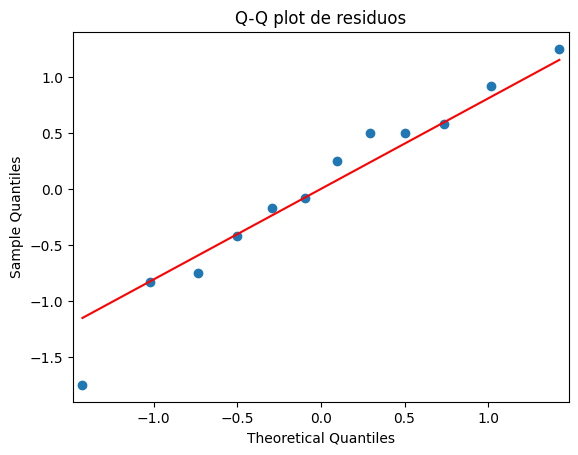

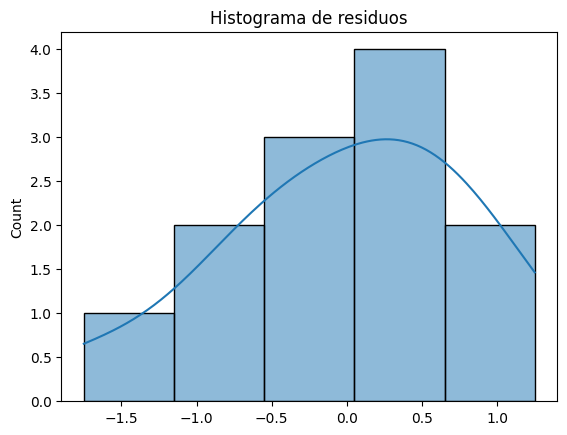

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['detergente'] == 'A']['valor']
grupo2 = df[df['detergente'] == 'B']['valor']
grupo3 = df[df['detergente'] == 'C']['valor']
grupo4 = df[df['detergente'] == 'D']['valor']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
if p < 0.05:
    print("Las varianzas no son iguales o hay heterocedasticidad")
else:
    print("Las varianzas son iguales o hay Homocedasticidad")

p-valor de Levene: 0.9432760038375858
Las varianzas son iguales o hay Homocedasticidad


 Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   1.3333 0.9847  -4.2963   6.963  False
     A      C   5.6667  0.495    0.037 11.2963   True
     A      D  -3.6667  0.779  -9.2963   1.963  False
     B      C   4.3333 0.6855  -1.2963   9.963  False
     B      D     -5.0 0.5887 -10.6296  0.6296  False
     C      D  -9.3333 0.1495  -14.963 -3.7037   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

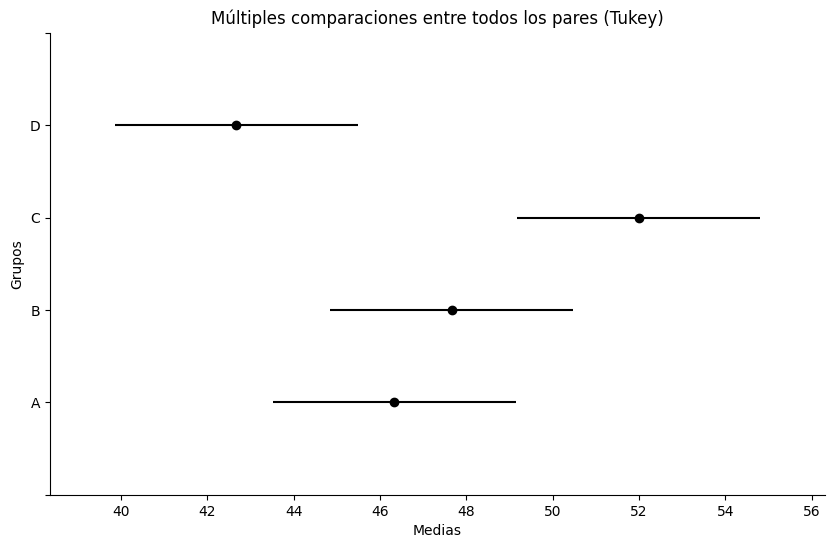

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['valor'], groups=df['detergente'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

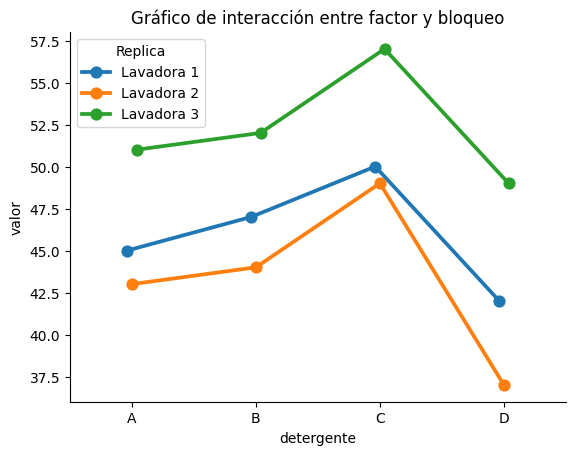

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="detergente", y="valor", hue="lavadora", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("detergente")
plt.ylabel("valor")
plt.legend(title="Replica")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()



## Problema 4
Con respecto al problema anterior:<br>
a) Conteste los tres incisos del problema anterior sin tomar en cuenta el efecto de las lavadoras y obtenga conclusiones.  
b) ¿Hay diferencias en las conclusiones anteriores y las del problema anterior? Explique su respuesta.  
c) ¿Con cuáles conclusiones se queda? Explique su respuesta.

## Problema 5
Una de las variables críticas en el proceso de ensamble del brazo lector de un disco duro es el ángulo que este forma con el cuerpo principal de la cabeza lectora. Se corre un experimento con el objetivo de comparar dos equipos que miden dicho ángulo en unidades de radianes. Se decide utilizar como factor de bloque a los operadores de los equipos. Los resultados se muestran en la siguiente tabla:

| Operador | Equipo 1                                         | Equipo 2                                         |
|----------|--------------------------------------------------|--------------------------------------------------|
| 1        | 1.328, 0.985, 1.316, 1.553, 1.310               | 1.273, 0.985, 1.134, 1.412, 0.917               |
|          | 1.113, 1.057, 1.144, 1.485, 1.386               | 0.789, 0.671, 0.554, 1.386, 1.289               |
| 2        | 1.269, 1.268, 1.091, 1.195, 1.380               | 1.036, 0.783, 1.108, 1.129, 1.132               |
|          | 1.093, 0.984, 1.087, 1.482, 1.442               | 0.201, 0.900, 0.916, 1.434, 1.223               |
| 3        | 1.440, 1.079, 1.389, 1.611, 1.445               | 1.454, 1.063, 1.219, 1.602, 1.583               |
|          | 1.150, 1.190, 1.247, 1.617, 1.574               | 1.018, 1.050, 0.997, 1.538, 1.478               |

### Preguntas y ejercicios:
a) Plantee el modelo y las hipótesis más adecuadas al problema.  
b) ¿Existen diferencias entre los equipos? Argumente estadísticamente.  
c) ¿Existen diferencias entre los operadores?  
d) Dibuje los diagramas de cajas simultáneos y las gráficas de medias para ambos factores, después interprételas.  
e) Verifique los supuestos de normalidad e igualdad de varianza entre tratamientos, así como la posible presencia de puntos aberrantes.


In [ ]:
import pandas as pd
from io import StringIO

data = '''
operador,equipo,valor
1,Equipo1,1.328
1,Equipo1,0.985
1,Equipo1,1.316
1,Equipo1,1.553
1,Equipo1,1.310
1,Equipo1,1.113
1,Equipo1,1.057
1,Equipo1,1.144
1,Equipo1,1.485
1,Equipo1,1.386
1,Equipo2,1.273
1,Equipo2,0.985
1,Equipo2,1.134
1,Equipo2,1.412
1,Equipo2,0.917
1,Equipo2,0.789
1,Equipo2,0.671
1,Equipo2,0.554
1,Equipo2,1.386
1,Equipo2,1.289
2,Equipo1,1.269
2,Equipo1,1.268
2,Equipo1,1.091
2,Equipo1,1.195
2,Equipo1,1.380
2,Equipo1,1.093
2,Equipo1,0.984
2,Equipo1,1.087
2,Equipo1,1.482
2,Equipo1,1.442
2,Equipo2,1.036
2,Equipo2,0.783
2,Equipo2,1.108
2,Equipo2,1.129
2,Equipo2,1.132
2,Equipo2,0.201
2,Equipo2,0.900
2,Equipo2,0.916
2,Equipo2,1.434
2,Equipo2,1.223
3,Equipo1,1.440
3,Equipo1,1.079
3,Equipo1,1.389
3,Equipo1,1.611
3,Equipo1,1.445
3,Equipo1,1.150
3,Equipo1,1.190
3,Equipo1,1.247
3,Equipo1,1.617
3,Equipo1,1.574
3,Equipo2,1.454
3,Equipo2,1.063
3,Equipo2,1.219
3,Equipo2,1.602
3,Equipo2,1.583
3,Equipo2,1.018
3,Equipo2,1.050
3,Equipo2,0.997
3,Equipo2,1.538
3,Equipo2,1.478
'''

df = pd.read_csv(StringIO(data))
df

,operador,equipo,valor
0,1,Equipo1,1.328
1,1,Equipo1,0.985
2,1,Equipo1,1.316
3,1,Equipo1,1.553
4,1,Equipo1,1.310
5,1,Equipo1,1.113
6,1,Equipo1,1.057
7,1,Equipo1,1.144
8,1,Equipo1,1.485
9,1,Equipo1,1.386


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'valor ~ C(operador) + C(equipo)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#H0:No hay diferencia significativa entre las replicas

,sum_sq,df,F,PR(>F)
C(operador),0.588721,2.0,4.834997,0.011561
C(equipo),0.492502,1.0,8.089543,0.006205
Residual,3.409351,56.0,NaN,NaN


valor-p (Shapiro) = 0.05501647805168102


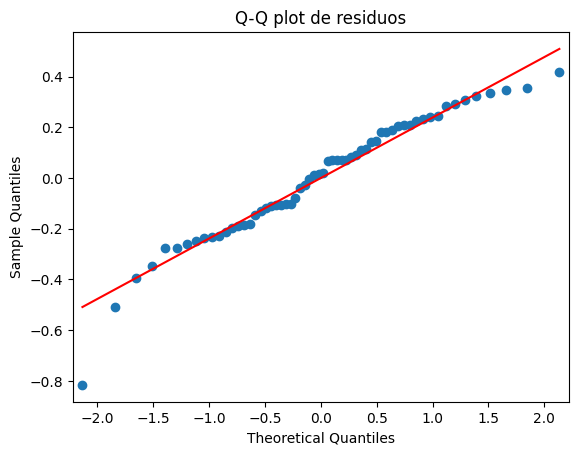

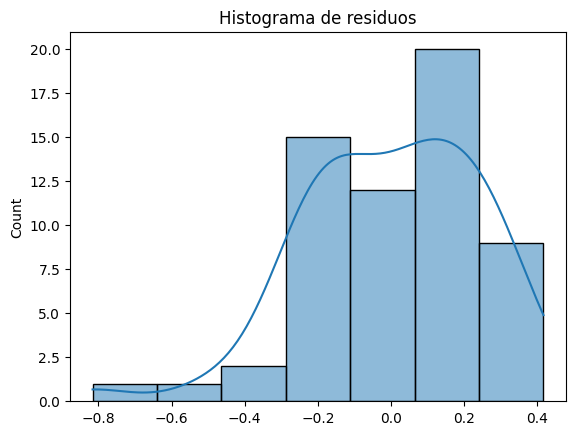

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['operador'] == 1]['valor']
grupo2 = df[df['operador'] == 2]['valor']
grupo3 = df[df['operador'] == 3]['valor']

stat, p = levene(grupo1, grupo2,grupo3 )
print(f"p-valor de Levene: {p}")
if p < 0.05:
    print("Las varianzas no son iguales o hay heterocedasticidad")
else:
    print("Las varianzas son iguales o hay Homocedasticidad")

p-valor de Levene: 0.8316443606977768
Las varianzas son iguales o hay Homocedasticidad


Multiple Comparison of Means - Tukey HSD, FWER=0.50
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.0467 0.8395 -0.1402 0.0468  False
     1      3   0.1829  0.078  0.0894 0.2763   True
     2      3   0.2296 0.0201  0.1361  0.323   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

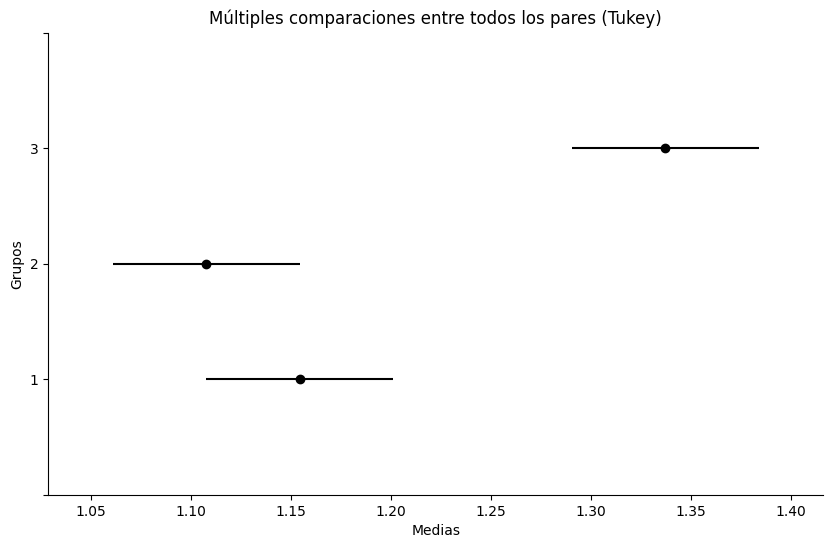

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['valor'], groups=df['operador'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

## Problema 6
Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. De manera tradicional se han usado termómetros de mercurio (Mer) para verificar que la temperatura sea la adecuada, pero ahora se han comprado termómetros electrónicos (Rtd) para facilitar el proceso de medición. Sin embargo, se duda de las mediciones de estos nuevos dispositivos. Para aclarar dudas y diagnosticar la situación, durante cinco días se toman mediciones con ambos tipos de termómetros en varios silos (a la misma hora). Los datos para cinco silos se muestran a continuación:

| Silo | Día 1 (Mer) | Día 1 (Rtd) | Día 2 (Mer) | Día 2 (Rtd) | Día 3 (Mer) | Día 3 (Rtd) | Día 4 (Mer) | Día 4 (Rtd) | Día 5 (Mer) | Día 5 (Rtd) |
|------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|--|
| A    | 4.0         | 2.6         | 4.0         | 2.8         | 5.0         | 5.0         | 0.5         | 0.0         | 3.0         | 2.4         |
| B    | 5.0         | 6.4         | 6.0         | 6.4         | 2.0         | 2.3         | 4.0         | 4.2         | 4.0         | 4.0         |
| C    | 4.5         | 3.3         | 4.0         | 1.4         | 3.5         | 1.8         | 2.0         | -1.9        | 3.0         | -7.6        |
| D    | 2.5         | 3.1         | 4.0         | 5.0         | 6.5         | 6.6         | 4.5         | 2.7         | 4.0         | 4.0         |
| E    | 4.0         | 0.0         | 4.0         | 3.5         | 0.6         | 2.0         | -4.0        | -4.0        | -4.0        | -6.3        |

**Preguntas:**<br>
a) Observe los datos y establezca una conjetura acerca de la confiabilidad de las mediciones con Rtd (del termómetro de mercurio no hay duda).  
b) Es claro que el silo se puede ver como tratamiento y día como bloque. Considere sólo los datos de Rtd y establezca el modelo estadístico. También haga el ANOVA correspondiente y obtenga conclusiones.  
c) Repita el inciso anterior pero ahora para las mediciones Mer.  
d) ¿Las conclusiones obtenidas en los incisos anteriores coinciden? Comente su respuesta.  
e) Datos pareados. Para comparar los dos métodos de medición (Mer y Rtd) obtenga como variable de respuesta la diferencia de temperatura que registran los métodos para cada día en cada silo. Considerando esto, establezca el modelo estadístico, haga el ANOVA correspondiente y obtenga conclusiones.


In [ ]:
import pandas as pd
from io import StringIO

data = """operador,equipo,valor
A,Mer,4.0
A,Rtd,2.6
A,Mer,4.0
A,Rtd,2.8
A,Mer,5.0
A,Rtd,5.0
A,Mer,0.5
A,Rtd,0.0
A,Mer,3.0
A,Rtd,2.4
B,Mer,5.0
B,Rtd,6.4
B,Mer,6.0
B,Rtd,6.4
B,Mer,2.0
B,Rtd,2.3
B,Mer,4.0
B,Rtd,4.2
B,Mer,4.0
B,Rtd,4.0
C,Mer,4.5
C,Rtd,3.3
C,Mer,4.0
C,Rtd,1.4
C,Mer,3.5
C,Rtd,1.8
C,Mer,2.0
C,Rtd,-1.9
C,Mer,3.0
C,Rtd,-7.6
D,Mer,2.5
D,Rtd,3.1
D,Mer,4.0
D,Rtd,5.0
D,Mer,6.5
D,Rtd,6.6
D,Mer,4.5
D,Rtd,2.7
D,Mer,4.0
D,Rtd,4.0
E,Mer,4.0
E,Rtd,0.0
E,Mer,4.0
E,Rtd,3.5
E,Mer,0.6
E,Rtd,2.0
E,Mer,-4.0
E,Rtd,-4.0
E,Mer,-4.0
E,Rtd,-6.3
"""

df = pd.read_csv(StringIO(data))
df.head()
#los termometros funcionan de manera diferente pero se consideran igual porque no tienen diferencia significtiva esta seria la conclusion

,operador,equipo,valor
0,A,Mer,4.0
1,A,Rtd,2.6
2,A,Mer,4.0
3,A,Rtd,2.8
4,A,Mer,5.0


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'valor ~ C(operador) + C(equipo)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#H0:No hay diferencia significativa entre las replicas

,sum_sq,df,F,PR(>F)
C(operador),168.4692,4.0,6.076839,0.000554
C(equipo),14.4722,1.0,2.088102,0.155535
Residual,304.9548,44.0,NaN,NaN


valor-p (Shapiro) = 0.03729182356645344


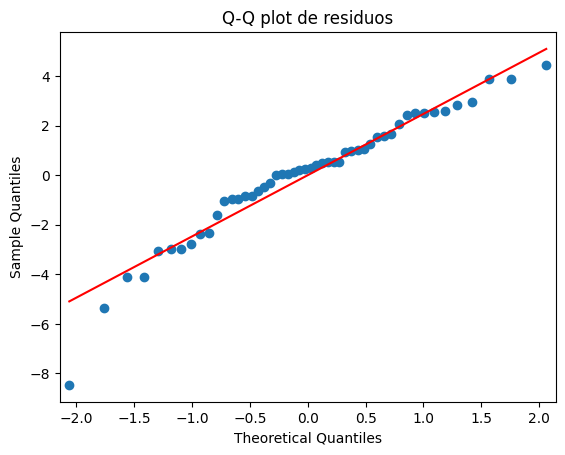

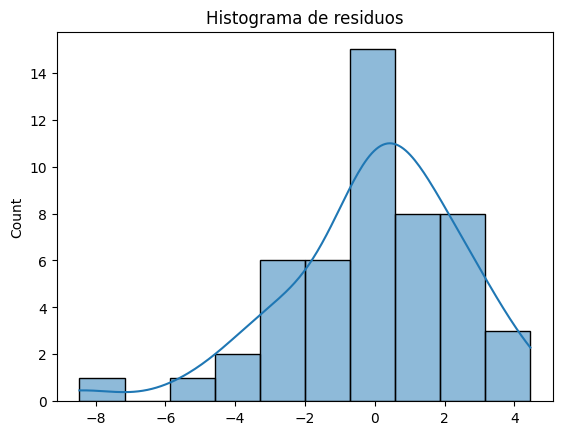

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['operador'] == 1]['valor']
grupo2 = df[df['operador'] == 2]['valor']
grupo3 = df[df['operador'] == 3]['valor']

stat, p = levene(grupo1, grupo2,grupo3 )
print(f"p-valor de Levene: {p}")
if p < 0.05:
    print("Las varianzas no son iguales o hay heterocedasticidad")
else:
    print("Las varianzas son iguales o hay Homocedasticidad")

## Problema 7
Se quiere estudiar el efecto de cinco diferentes catalizadores (**A, B, C, D y E**) sobre el **tiempo de reacción** de un proceso químico. Cada lote de material sólo permite cinco corridas y cada corrida requiere aproximadamente 1.5 horas, por lo que sólo se pueden realizar cinco corridas diarias. El experimentador decide correr los experimentos con un diseño en cuadro latino para controlar activamente a los **lotes y días**. Los datos obtenidos son:

| Lote | Día 1 | Día 2 | Día 3 | Día 4 | Día 5 |
|------|-------|-------|-------|-------|-------|
| 1    | A = 8 | B = 7 | D = 1 | C = 7 | E = 3 |
| 2    | C = 11| E = 2 | A = 7 | D = 3 | B = 8 |
| 3    | B = 4 | A = 9 | C = 10| E = 1 | D = 5 |
| 4    | D = 6 | C = 8 | E = 6 | B = 6 | A = 10|
| 5    | E = 4 | D = 2 | B = 3 | A = 8 | C = 8 |


**Preguntas:**<br>
a) ¿Cómo se aleatorizó el experimento?  
b) Anote la ecuación del modelo y las hipótesis estadísticas correspondientes.  
c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?  
d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?  
e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?  
f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.


In [2]:
import pandas as pd
from io import StringIO

data = '''
lote,dia,metodo,valor
1,1,A,8
1,2,B,7
1,3,D,1
1,4,C,7
1,5,E,3
2,1,C,11
2,2,E,2
2,3,A,7
2,4,D,3
2,5,B,8
3,1,B,4
3,2,A,9
3,3,C,10
3,4,E,1
3,5,D,5
4,1,D,6
4,2,C,8
4,3,E,6
4,4,B,6
4,5,A,10
5,1,E,4
5,2,D,2
5,3,B,3
5,4,A,8
5,5,C,8
'''

df = pd.read_csv(StringIO(data))
df

,lote,dia,metodo,valor
0,1,1,A,8
1,1,2,B,7
2,1,3,D,1
3,1,4,C,7
4,1,5,E,3
5,2,1,C,11
6,2,2,E,2
7,2,3,A,7
8,2,4,D,3
9,2,5,B,8


In [4]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'valor ~ C(lote) + C(dia) + C(metodo)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#H0:No hay diferencia significativa entre las replicas

,sum_sq,df,F,PR(>F)
C(lote),15.44,4.0,1.234542,0.347618
C(dia),12.24,4.0,0.978678,0.455014
C(metodo),141.44,4.0,11.309168,0.000488
Residual,37.52,12.0,NaN,NaN


valor-p (Shapiro) = 0.5476371878728061


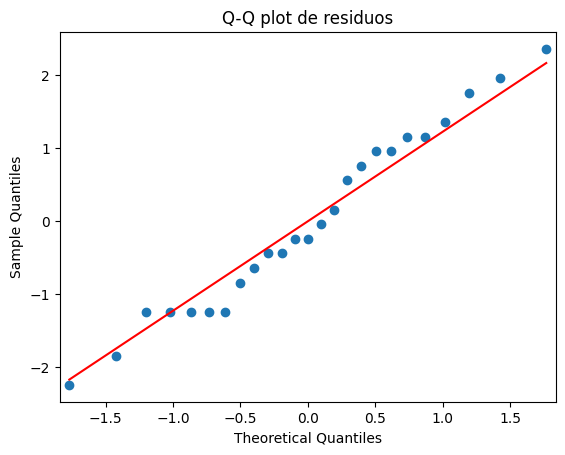

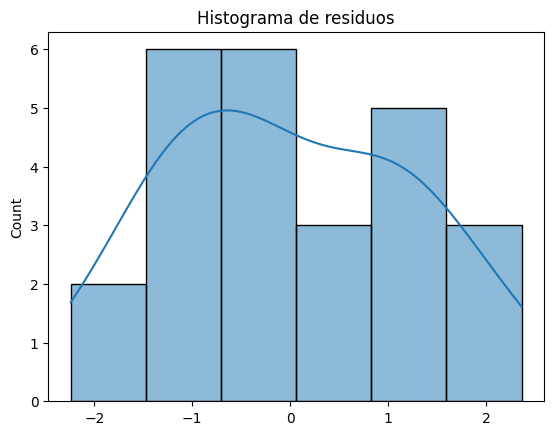

In [5]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [6]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['metodo'] == 'A']['valor']
grupo2 = df[df['metodo'] == 'B']['valor']
grupo3 = df[df['metodo'] == 'C']['valor']
grupo4 = df[df['metodo'] == 'D']['valor']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.6324588439234449


Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1423 -4.6547 -0.9453   True
     A      C      0.4 0.9965 -1.4547  2.2547  False
     A      D     -5.0 0.0024 -6.8547 -3.1453   True
     A      E     -5.2 0.0016 -7.0547 -3.3453   True
     B      C      3.2 0.0733  1.3453  5.0547   True
     B      D     -2.2 0.3361 -4.0547 -0.3453   True
     B      E     -2.4 0.2578 -4.2547 -0.5453   True
     C      D     -5.4 0.0011 -7.2547 -3.5453   True
     C      E     -5.6 0.0007 -7.4547 -3.7453   True
     D      E     -0.2 0.9998 -2.0547  1.6547  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

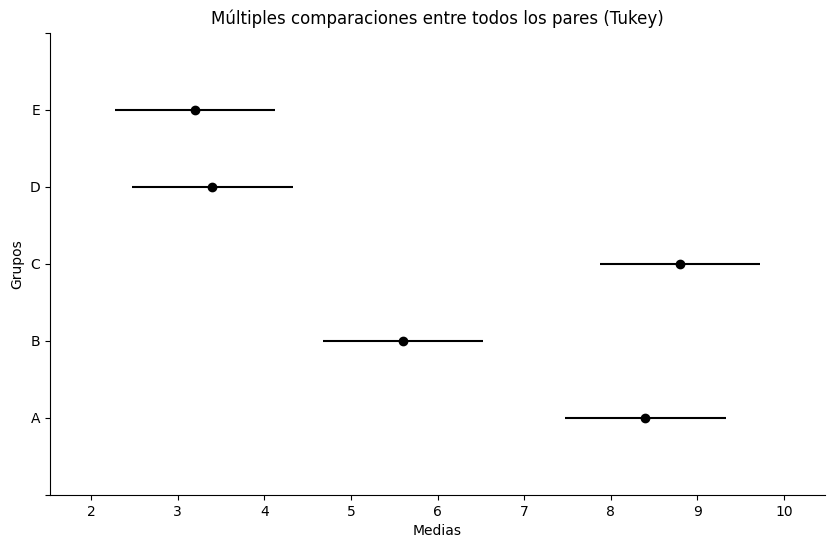

In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['valor'], groups=df['metodo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

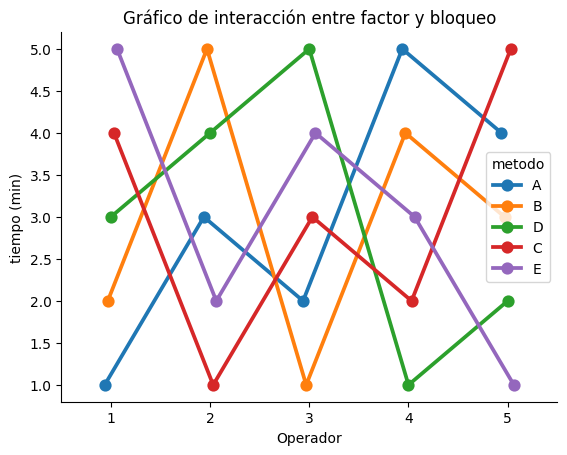

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="lote", y="dia", hue="metodo", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("Operador")
plt.ylabel("tiempo (min)")
plt.legend(title="metodo")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()


In [10]:
df.groupby(["metodo"])["valor"].mean()

,valor
metodo,
A,8.4
B,5.6
C,8.8
D,3.4
E,3.2


## Problema 8
En el problema anterior elimine el factor de bloque días, y conteste:

a) ¿Se justifica la eliminación?  
b) Sin tomar en cuenta el día, señale el nombre del diseño, el modelo y las hipótesis más adecuadas al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error, en este caso con el del problema anterior. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y del anterior?


## Problema 9
Con respecto a los problemas 7 y 8, además de eliminar el factor día ahora elimine el factor lote, y conteste lo siguiente:

a) ¿Se justifica esta segunda eliminación en ambos problemas?  
b) Después de la doble eliminación, señale el nombre del diseño, el modelo y la(s) hipótesis más adecuada(s) al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error obtenido con los de los problemas 16 y 17. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y de los dos anteriores?  
f) ¿Cree que esta eliminación hubiese afectado si los factores de bloque hubieran sido significativos?  


## Problema 10
Se comprueba el peso en gramos de un material de tres proveedores: **A, B y C**, por tres diferentes inspectores: **I, II y III**, utilizando tres diferentes escalas: **1, 2 y 3**. El experimento se lleva a cabo como el siguiente cuadro latino:

| Inspector | Escala 1 | Escala 2 | Escala 3 |
|-----------|----------|----------|----------|
| I         | A = 16   | B = 10   | C = 11   |
| II        | B = 15   | C = 9    | A = 14   |
| III       | C = 13   | A = 11   | B = 13   |

**Preguntas:**<br>
a) ¿Hay diferencias entre los proveedores?  
b) ¿Hay diferencias entre los inspectores y entre las escalas?  
c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?  
d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.  


## Problema 11
Cuando se comparan varios fertilizantes o diferentes variedades de cierto cultivo, es típico que se deba considerar el gradiente de fertilidad del suelo (factor columna) o los efectos residuales de cultivos previos (factor renglón). Considerando estos factores de bloque, Gomez y Gomez (1984) plantean un experimento en cuadro latino para comparar, en cuanto a rendimiento en toneladas por hectárea, tres variedades de maíz híbrido (**A, B, C**) y una variedad control (**D**). Para ello, se utiliza un campo agrícola cuadrado de 16 hectáreas, dividido en parcelas de una hectárea. Los datos de rendimiento obtenidos en cada parcela se muestran a continuación:

| Ren\Col | 1       | 2       | 3       | 4       |
|---------|---------|---------|---------|---------|
| 1       | 1.640(B)| 1.210(D)| 1.425(C)| 1.345(A)|
| 2       | 1.475(C)| 1.185(A)| 1.400(D)| 1.290(B)|
| 3       | 1.670(A)| 0.710(C)| 1.665(B)| 1.180(D)|
| 4       | 1.565(D)| 1.290(B)| 1.655(A)| 0.660(C)|

**Preguntas y ejercicios:**<br>
a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?  
b) ¿Cuál de los factores de bloque tuvo efectos?  
c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?  
d) ¿Y con un diseño en bloques completos al azar?  


## Problema 12
Se quieren comparar tres dietas (**A, B, C**) a base de proteínas de origen vegetal utilizando 18 ratas de laboratorio de una misma camada. Primero se observa por un tiempo el apetito para formar tres grupos de seis ratas, según su voracidad; y cada uno de estos grupos se clasifica a su vez en tres grupos de dos ratas, de acuerdo a su peso inicial. Se plantea un experimento donde la variable de respuesta es el peso en gramos ganado por las ratas después de cierto periodo, con los siguientes resultados:

| Apetito/peso inicial | A1        | A2        | A3        |
|-----------------------|-----------|-----------|-----------|
| P1                   | 67 (C)    | 105 (A)   | 95 (B)    |
|                       | 72        | 112       | 86        |
| P2                   | 85 (A)    | 75 (B)    | 88 (C)    |
|                       | 98        | 67        | 110       |
| P3                   | 66 (B)    | 68 (C)    | 108 (A)   |
|                       | 47        | 91        | 120       |

### Preguntas:
a) Analice los datos. ¿Cuáles de los factores influyen en el peso ganado por las ratas?  
b) ¿Cuál dieta es mejor?  
c) ¿Alguno de los factores de bloque puede ser ignorado? Argumente su respuesta.  
d) Si ese fuera el caso, analice de nuevo el experimento y saque conclusiones.  
e) Verifique los supuestos del modelo.  


## Problema 13
Una compañía distribuidora ubicada en los suburbios está interesada en estudiar la diferencia en costos (tiempo y gasolina) entre las cuatro rutas (**A, B, C, D**) que llevan a la zona comercial, más importante para ellos, en el otro extremo de la ciudad. Deciden correr un experimento en cuadro grecolatino controlando los factores de bloque **chofer**, marca de vehículo (**α, β, χ, δ**) y día de la semana. El experimento se repite en dos semanas diferentes, en las cuales no hay días festivos ni quincenas. Los costos observados en pesos se muestran en la siguiente tabla:

| Chofer/día | Lunes       | Martes      | Miércoles   | Jueves      |
|------------|-------------|-------------|-------------|-------------|
| Carlos     | 825(D, α)   | 585(C, χ)   | 550(B, β)   | 580(A, δ)   |
|            | 750         | 610         | 580         | 650         |
| Enrique    | 650(A, χ)   | 540(B, α)   | 580(C, χ)   | 850(D, β)   |
|            | 725         | 560         | 635         | 770         |
| Genaro     | 700(C, β)   | 650(D, δ)   | 635(A, α)   | 450(B, χ)   |
|            | 675         | 740         | 540         | 550         |
| Luis       | 475(B, δ)   | 560(A, β)   | 650(D, α)   | 670(C, α)   |
|            | 480         | 615         | 725         | 730         |

### Preguntas:
a) Haga el análisis de varianza de este experimento.  
b) Realice las pruebas de comparaciones múltiples para los factores significativos.  
c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.  
d) ¿Cuál es la mejor ruta? ¿Cuál es la peor?  
e) ¿Hay diferencias significativas entre los choferes? ¿Y entre el tipo o marca de unidad?  
f) ¿Cuáles factores de bloque valió la pena tomar en cuenta en el experimento?  
g) ¿Por qué se evitaron días festivos y quincenas en el experimento? ¿Cuáles otros aspectos se tenían que tomar en cuenta?  
h) Verifique los supuestos del modelo.  


## Problema 14
23. Un investigador está interesado en el efecto del porcentaje de lisina y del porcentaje de proteína en la producción de vacas lecheras. Se consideran siete niveles en cada factor:

- **% de lisina**: 0.0 (**A**), 0.1 (**B**), 0.2 (**C**), 0.3 (**D**), 0.4 (**E**), 0.5 (**F**), 0.6 (**G**).  
- **% de proteína**: 2 (**α**), 4 (**β**), 6 (**χ**), 8 (**δ**), 10 (**ε**), 12 (**φ**), 14 (**γ**).  

Para el estudio, se seleccionaron siete vacas al azar, a las cuales se les da un seguimiento de siete periodos de tres meses. Los datos en galones de leche fueron los siguientes:

| Vaca/periodo | 1       | 2       | 3       | 4       | 5       | 6       | 7       |
|--------------|---------|---------|---------|---------|---------|---------|---------|
| 1            | 304 (Aα)| 436 (Bε)| 350 (Cβ)| 504 (Dφ)| 417 (Eχ)| 519 (Fγ)| 432 (Gδ)|
| 2            | 381 (Bβ)| 505 (Cφ)| 425 (Dχ)| 564 (Eγ)| 487 (Fα)| 536 (Gε)| 483 (Aχ)|
| 3            | 432 (Cχ)| 566 (Dγ)| 479 (Eε)| 357 (Fα)| 466 (Gβ)| 465 (Aφ)| 507 (Bγ)|
| 4            | 442 (Dδ)| 372 (Eχ)| 536 (Fε)| 366 (Gβ)| 495 (Aχ)| 425 (Bφ)| 507 (Cγ)|
| 5            | 496 (Eε)| 449 (Fβ)| 493 (Gφ)| 345 (Aχ)| 509 (Bγ)| 481 (Cδ)| 380 (Dα)|
| 6            | 534 (Fφ)| 421 (Gχ)| 352 (Aγ)| 427 (Bδ)| 346 (Cχ)| 478 (Dε)| 397 (Eβ)|
| 7            | 543 (Gγ)| 386 (Aδ)| 435 (Bα)| 485 (Cε)| 406 (Dφ)| 554 (Eφ)| 410 (Fχ)|

### Preguntas y ejercicios:
a) Analice este experimento. ¿Qué factores tienen efecto en la producción de leche?  
b) Interprete los resultados usando gráficos de medias.  
c) ¿Cómo puede explicar la falta de efectos en vacas y periodo?  
d) ¿Qué porcentajes de lisina y proteína dan los mejores resultados?  
e) Verifique los supuestos del modelo.  
